# Librerias

In [1]:
import json
from spotipy.oauth2 import SpotifyOAuth
import spotipy

with open("D:/Academia/Ayudantia/Codigos/S6/spoty_JSON.json", "r") as f:
    creds = json.load(f)

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=creds["client_id"],
    client_secret=creds["client_secret"],
    redirect_uri=creds["redirect_uri"],
    scope=creds["scope"]
))

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from tqdm import tqdm

# Obtener credenciales

In [3]:
#ID del cliente.
client_id = creds["client_id"]

#Secret client.
client_secret = creds["client_secret"]

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)

#Cliente que sconsumirá la API.
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Datos de un artista

In [14]:
#info de Michael Jackson.
michael_info = sp.search(q='Michael Jackson', type='artist', limit=1)

michael_info

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


{'artists': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=1&query=Michael%20Jackson&type=artist',
  'limit': 1,
  'next': 'https://api.spotify.com/v1/search?offset=1&limit=1&query=Michael%20Jackson&type=artist',
  'offset': 0,
  'previous': None,
  'total': 856,
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3fMbdgg4jU18AjLCKBhRSm'},
    'followers': {'href': None, 'total': 36782269},
    'genres': [],
    'href': 'https://api.spotify.com/v1/artists/3fMbdgg4jU18AjLCKBhRSm',
    'id': '3fMbdgg4jU18AjLCKBhRSm',
    'images': [{'url': 'https://i.scdn.co/image/ab6761610000e5eb997cc9a4aec335d46c9481fd',
      'height': 640,
      'width': 640},
     {'url': 'https://i.scdn.co/image/ab67616100005174997cc9a4aec335d46c9481fd',
      'height': 320,
      'width': 320},
     {'url': 'https://i.scdn.co/image/ab6761610000f178997cc9a4aec335d46c9481fd',
      'height': 160,
      'width': 160}],
    'name': 'Michael Jackson',
    'popularity': 87,
    'type':

Ahora accedemos a un elemento en particular del diccionario, en este caso, al número total de seguidores del grupo en la plataforma:

In [15]:
#Se imprime el número de seguidores de Michael Jackson.
michael_info['artists']['items'][0]['followers']['total']

36782269

In [16]:
#ID de MJ
MJ_id = result['artists']['items'][0]['id']

#Las 10 canciones más escuchadas de Michael Jackson
results = sp.artist_top_tracks(MJ_id)

for track in results['tracks']:
    print(track['name'])

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


Billie Jean
Beat It
Chicago
Smooth Criminal - 2012 Remaster
Rock with You - Single Version
The Way You Make Me Feel - 2012 Remaster
Thriller
Don't Stop 'Til You Get Enough
P.Y.T. (Pretty Young Thing)
Remember the Time


## Top 100 canciones de un género

Creamos una función para la extracción de 100 canciones de un género definido (parámetro de entrada), sus características, y ordena la información en un dataFrame de Pandas:

[Géneros de música](https://everynoise.com/everynoise1d.html)

In [21]:
#Obtiene n canciones de un género
def get_tracks_by_genre(genre, n=100, market=None):
    track_data = []
    limit = 50  #máximo permitido por Spotify

    for offset in range(0, n, limit):
        results = sp.search(q=f'genre:{genre}', type='track', limit=limit, offset=offset, market=market)
        track_ids = [track['id'] for track in results['tracks']['items']]
        
        if not track_ids:
            break

        tracks_info = sp.tracks(track_ids)

        for track in tracks_info['tracks']:
            track_data.append({
                'genre': genre,
                'name': track['name'],
                'artists_name': ', '.join([artist['name'] for artist in track['artists']]),
                'album_name': track['album']['name'],
                'album_release_date': track['album']['release_date'],
                'duration_ms': track['duration_ms'],
                'popularity': track['popularity'],
                'track_number': track['track_number'],
                'uri': track['uri']
            })

        #Si ya no devuelve canciones, rompemos el ciclo
        if len(results['tracks']['items']) < limit:
            break

    return pd.DataFrame(track_data)

In [22]:
df_pop = get_tracks_by_genre("dance pop", n=100, market="US")
df_pop.head()

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


,genre,name,artists_name,album_name,album_release_date,duration_ms,popularity,track_number,uri
0,dance pop,We Like To Party! (The Vengabus),Vengaboys,The Party Album!,1999-06-04,222458,70,1,spotify:track:73ljrkSg4A0q3ByU0Cu7mw
1,dance pop,Duri Duri (Baila Baila),Click,Duri Duri,1987,294870,55,1,spotify:track:7ft4Kl0QcL5no8eTGtod39
2,dance pop,Brother Louie Mix '98 (feat. Eric Singleton) -...,"Modern Talking, Eric Singleton",Back For Good/2nd,1998-05-11,204306,69,15,spotify:track:2X7jfQnEMQYYmvkhr6mzS9
3,dance pop,Your Love - Radio Edit,Lime,Your Love,1981,242733,57,9,spotify:track:0wgXzjgHh13xFz9S92SZpN
4,dance pop,DON'T YOU WORRY,"Black Eyed Peas, Shakira, David Guetta",DON'T YOU WORRY,2022-06-17,196363,66,1,spotify:track:0gYXw7aPoybWFfB7btQ0eM


In [24]:
for i in sorted(df_pop["artists_name"].unique()):
  print(i)

ADÉLA
Alesso, Zara Larsson
Alok, Ella Eyre, Kenny Dope, Never Dull
Aqua
Ava Max
Avicii
Axwell /\ Ingrosso, Axwell, Sebastian Ingrosso
BLOND:ISH, Stevie Appleton
BUNT., Tom Odell
Baltimora
Black Eyed Peas, J Balvin
Black Eyed Peas, Shakira, David Guetta
CYRIL, maryjo
Calvin Harris, Disciples
Calvin Harris, Dua Lipa
Calvin Harris, Sam Smith
Calvin Harris, Sam Smith, Jessie Reyez
Cash Cash, Bebe Rexha
Click
DJ Snake, Bipolar Sunshine
David Guetta, Alphaville, Ava Max
David Guetta, Anne-Marie, Coi Leray
David Guetta, Bebe Rexha
David Guetta, Kelly Rowland
David Guetta, Sia
David Guetta, USHER
Eiffel 65, Gabry Ponte
Elton John, Dua Lipa, PNAU
Galantis
HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demon Hunters Cast, David Guetta
ILLENIUM, Norma Jean Martine
Icona Pop
Imagine Dragons, Broiler
James Hype, Sam Harper, Bobby Harvey
Joel Corry, Jax Jones, Charli xcx, Saweetie
Jonas Blue, Dakota
Kungs, Cookin' On 3 Burners
Kygo, Parson James
Kylie Minogue
Lady Gaga, Ariana Grande
Lilly Wood and The P

In [25]:
len(df_pop["artists_name"].unique())

74

In [31]:
#De esos artistas, cuántas veces aparecen en el top 100? (Solo los que aparecen 2 o más veces)
artist_counts = df_pop["artists_name"].value_counts().reset_index()
artist_counts.columns = ["artist", "count"]
artist_counts.sort_values("count", ascending=False)
artist_counts_filtered = artist_counts[artist_counts["count"] >= 2]
artist_counts_filtered

,artist,count
0,Avicii,7
1,Vengaboys,5
2,"Black Eyed Peas, J Balvin",3
3,"Lost Frequencies, Calum Scott",2
4,"Majestic, Boney M.",2
5,Regard,2
6,"David Guetta, Kelly Rowland",2
7,"Calvin Harris, Disciples",2
8,"Lilly Wood and The Prick, Robin Schulz",2
9,Kylie Minogue,2


Separar artistas para que estén de forma individual con `explode` y contabilizar bien sus apariciones

In [35]:
artist_counts_corrected = df_pop['artists_name'].str.split(', ').explode().value_counts().reset_index()
artist_counts_corrected.columns = ['artist', 'count']
artist_counts_corrected = artist_counts_corrected.sort_values("count", ascending=False)
artist_counts_filtered = artist_counts_corrected[artist_counts_corrected["count"] >= 2]
artist_counts_filtered

,artist,count
0,David Guetta,10
1,Avicii,7
2,Calvin Harris,6
3,Vengaboys,5
4,Dua Lipa,5
5,Ava Max,5
6,Black Eyed Peas,4
7,Lost Frequencies,3
8,Sam Smith,3
9,Robin Schulz,3


In [43]:
#¿Qué canciones de David Guetta	salen en el top 100?
canciones_david_guetta = df_pop[df_pop['artists_name'].str.contains("David Guetta")]
canciones_david_guetta

,genre,name,artists_name,album_name,album_release_date,duration_ms,popularity,track_number,uri
4,dance pop,DON'T YOU WORRY,"Black Eyed Peas, Shakira, David Guetta",DON'T YOU WORRY,2022-06-17,196363,66,1,spotify:track:0gYXw7aPoybWFfB7btQ0eM
14,dance pop,Without You (feat. Usher),"David Guetta, USHER",Nothing but the Beat (Ultimate Edition),2012-12-07,208133,76,4,spotify:track:3UN6cIn3VIyg0z1LCuFSum
15,dance pop,Beautiful People,"David Guetta, Sia",Beautiful People,2025-03-07,187086,83,1,spotify:track:4TwEdnSiTPDR1vg1QZ5K8W
20,dance pop,Baby Don't Hurt Me,"David Guetta, Anne-Marie, Coi Leray",Baby Don't Hurt Me,2023-04-06,140017,79,1,spotify:track:3BKD1PwArikchz2Zrlp1qi
23,dance pop,When Love Takes Over (feat. Kelly Rowland),"David Guetta, Kelly Rowland",One More Love,2010-11-22,191000,74,1,spotify:track:0GWGZA5mxo9nHuSyrj70uo
40,dance pop,Golden - David Guetta REM/X,"HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo...",Golden (from the Netflix film KPop Demon Hunters),2025-06-19,176250,77,3,spotify:track:2nR5PWtpraC5cBZZ904oQr
58,dance pop,When Love Takes Over (feat. Kelly Rowland),"David Guetta, Kelly Rowland",One Love (Deluxe),2009-08-21,191000,59,5,spotify:track:77FULy278MulVvGWS8BfK7
59,dance pop,I'm Good (Blue),"David Guetta, Bebe Rexha",I'm Good (Blue),2022-08-26,175238,85,1,spotify:track:4uUG5RXrOk84mYEfFvj3cK
71,dance pop,Golden - David Guetta REM/X,"HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo...",Golden [David Guetta REM/X (from the Netflix f...,2025-07-25,176250,72,1,spotify:track:5tVnzVWIKrmmuOPGbXUbT4
93,dance pop,Forever Young,"David Guetta, Alphaville, Ava Max",Forever Young,2024-10-18,156923,75,1,spotify:track:3bg2qahpZmsg5wV2EMPXIk


## Endpoints
* [Albums](https://developer.spotify.com/documentation/web-api/reference/get-an-album)
* [Artistas](https://developer.spotify.com/documentation/web-api/reference/get-an-artist)
* [Playlists](https://developer.spotify.com/documentation/web-api/reference/get-playlist)
* [Tracks](https://developer.spotify.com/documentation/web-api/reference/get-track)

# DataFrame

## Token de autorización

In [5]:
redurect_uri = "http://127.0.0.1:9999/callback"
scope = "user-library-read"

#Obtener el token de acceso
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redurect_uri,
    scope=scope
))

user_info = sp.current_user()
print("\n¡Autenticación exitosa!")
print(f"Hola, {user_info['display_name']} (ID: {user_info['id']})")

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache



¡Autenticación exitosa!
Hola, Daniel Garcia Sanchez (ID: 31lcmrfqrb65qm5xq2qfhrztsms4)


In [6]:
# Obtenemos el total de canciones guardadas
total_tracks = sp.current_user_saved_tracks(limit=1)['total']
total_tracks

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


1085

In [9]:
import pandas as pd
import time
from tqdm import tqdm
from langdetect import detect, LangDetectException

In [10]:
#Obtenemos la información de cada canción

print("Obteniendo detalles de cada canción en tus 'Me Gusta'...")

all_songs_data = []

#Iteramos sobre todas las canciones en bloques de 50
for offset in tqdm(range(0, total_tracks, 50), desc="Procesando páginas de canciones"):
    results = sp.current_user_saved_tracks(limit=50, offset=offset)

    for item in results['items']:
        track = item['track']
        
        #Saltamos canciones que no tienen datos en la API
        if not track or not track['artists']:
            continue
            
        #Saber el idioma de la canción
        try:
            language = detect(track['name'])
        except LangDetectException:
            language = 'desconocido'

        #Guardamos los datos de cada artista de la canción
        for artist in track['artists']:
            all_songs_data.append({
                'song_id': track['id'],
                'song_name': track['name'],
                'artist_id': artist['id'], 
                'artist_name': artist['name'],
                'language': language, #idioma de la canción
                'popularity': track['popularity'], #de 0 a 100
                'duration_min': track['duration_ms'] / 60000, #Duración en minutos
                'album_name': track['album']['name'],
                'album_release_date': track['album']['release_date'],
                'spotify_url': track['external_urls']['spotify']
            })
            
    time.sleep(0.5)


#DF inicial con todas las canciones
df_all_songs = pd.DataFrame(all_songs_data)
df_all_songs.head()

Obteniendo detalles de cada canción en tus 'Me Gusta'...


Procesando páginas de canciones:   0%|                                                          | 0/22 [00:00<?, ?it/s]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Procesando páginas de canciones:   5%|██▎                                               | 1/22 [00:04<01:26,  4.11s/it]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Procesando páginas de canciones:   9%|████▌                                             | 2/22 [00:05<00:54,  2.73s/it]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Procesando páginas de canciones:  14%|██████▊                                           | 3/22 [00:07<00:46,  2.43s/it]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Procesando páginas de canciones:  18%|█████████                                         | 4/22 [00:09<00:39,  2.20s/it]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Procesando páginas de canciones:  23%|███████

,song_id,song_name,artist_id,artist_name,language,popularity,duration_min,album_name,album_release_date,spotify_url
0,2BwO5K8Q7EPAJSGze3AAh9,Manchild,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,sw,86,3.560750,Man’s Best Friend,2025-08-29,https://open.spotify.com/track/2BwO5K8Q7EPAJSG...
1,42VUCXerQ5qTr4Qp6PhKo4,Tears,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,en,91,2.669717,Man’s Best Friend,2025-08-29,https://open.spotify.com/track/42VUCXerQ5qTr4Q...
2,6n05BgVkxxz2k5ICZYa2PH,Fast Times,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,et,67,2.908983,emails i can't send,2022-07-15,https://open.spotify.com/track/6n05BgVkxxz2k5I...
3,64BbK9SFKH2jk86U3dGj2P,Otherside,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,en,84,4.256217,Californication (Deluxe Edition),1999-06-08,https://open.spotify.com/track/64BbK9SFKH2jk86...
4,1DIXPcTDzTj8ZMHt3PDt8p,Gangsta's Paradise,3y24n3XhZ96wgwRXjvS17T,Coolio,id,85,4.011550,Gangsta's Paradise,1995-11-07,https://open.spotify.com/track/1DIXPcTDzTj8ZMH...


Podemos notar que detecta canciones como "Manchild" en idioma  Swahili, por lo que no será muy util para el análisis

In [17]:
df_all_songs.drop('language', axis=1)

,song_id,song_name,artist_id,artist_name,popularity,duration_min,album_name,album_release_date,spotify_url
0,2BwO5K8Q7EPAJSGze3AAh9,Manchild,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,86,3.560750,Man’s Best Friend,2025-08-29,https://open.spotify.com/track/2BwO5K8Q7EPAJSG...
1,42VUCXerQ5qTr4Qp6PhKo4,Tears,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,91,2.669717,Man’s Best Friend,2025-08-29,https://open.spotify.com/track/42VUCXerQ5qTr4Q...
2,6n05BgVkxxz2k5ICZYa2PH,Fast Times,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,67,2.908983,emails i can't send,2022-07-15,https://open.spotify.com/track/6n05BgVkxxz2k5I...
3,64BbK9SFKH2jk86U3dGj2P,Otherside,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,84,4.256217,Californication (Deluxe Edition),1999-06-08,https://open.spotify.com/track/64BbK9SFKH2jk86...
4,1DIXPcTDzTj8ZMHt3PDt8p,Gangsta's Paradise,3y24n3XhZ96wgwRXjvS17T,Coolio,85,4.011550,Gangsta's Paradise,1995-11-07,https://open.spotify.com/track/1DIXPcTDzTj8ZMH...
...,...,...,...,...,...,...,...,...,...
1365,63qapUS8yLKz0tb0eOgOTF,Million Eyes,5nAiCPenjjdpUJAmElxmuu,Loïc Nottet,54,4.220000,Selfocracy,2017-03-31,https://open.spotify.com/track/63qapUS8yLKz0tb...
1366,4pZ8WNPIuBAfmq09vLMuOx,Team8,5nAiCPenjjdpUJAmElxmuu,Loïc Nottet,21,3.397100,Selfocracy,2017-03-31,https://open.spotify.com/track/4pZ8WNPIuBAfmq0...
1367,08O9ITh2Pj9xEA0IVRuIDV,Mud Blood,5nAiCPenjjdpUJAmElxmuu,Loïc Nottet,36,3.078217,Selfocracy,2017-03-31,https://open.spotify.com/track/08O9ITh2Pj9xEA0...
1368,08IRTHjJZ2Wnv1Qvdh1eNi,Candy Maker,5nAiCPenjjdpUJAmElxmuu,Loïc Nottet,20,2.126000,Candy,2019-10-31,https://open.spotify.com/track/08IRTHjJZ2Wnv1Q...


In [25]:
#Obtener los géneros para cada artista

#xtraemos los IDs de artistas únicos para no hacer llamadas repetidas
unique_artist_ids = df_all_songs['artist_id'].unique().tolist()

#Géneros de cada artista
artist_genres_map = {}

for i in tqdm(range(0, len(unique_artist_ids), 50), desc="Consultando géneros de artistas"):
    #Bloques de 50 IDs
    batch_ids = unique_artist_ids[i:i + 50]
    artists_info = sp.artists(batch_ids)
    
    #Guardamos los géneros de cada artista en el diccionario
    for artist in artists_info['artists']:
        artist_genres_map[artist['id']] = artist['genres']

#Unimos los géneros al DataFrame original usando el artist_id
df_all_songs['genres'] = df_all_songs['artist_id'].map(artist_genres_map)
df_all_songs[['artist_name', 'genres']].head()

Consultando géneros de artistas:   0%|                                                           | 0/7 [00:00<?, ?it/s]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Consultando géneros de artistas:  14%|███████▎                                           | 1/7 [00:01<00:09,  1.58s/it]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Consultando géneros de artistas:  29%|██████████████▌                                    | 2/7 [00:02<00:05,  1.00s/it]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Consultando géneros de artistas:  43%|█████████████████████▊                             | 3/7 [00:02<00:03,  1.24it/s]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Consultando géneros de artistas:  57%|█████████████████████████████▏                     | 4/7 [00:03<00:02,  1.41it/s]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Consultando géneros de artistas:  71%|███████

,artist_name,genres
0,Sabrina Carpenter,[]
1,Sabrina Carpenter,[]
2,Sabrina Carpenter,[]
3,Red Hot Chili Peppers,"[funk rock, alternative rock, rock]"
4,Coolio,"[west coast hip hop, g-funk]"


In [19]:
#Agrupamo por artista
df_artist_summary = df_all_songs.groupby('artist_name').agg(
    # Contamos cuántas canciones tiene cada artista
    song_count=('song_id', 'count'),
    # Creamos una lista con los nombres de las canciones
    song_titles=('song_name', lambda x: list(x.unique()))
).sort_values(by='song_count', ascending=False).reset_index()


df_artist_summary.head(10)

,artist_name,song_count,song_titles
0,Imagine Dragons,49,"[Heart Upon My Sleeve (feat. Imagine Dragons),..."
1,Sia,43,"[Wild Ones (feat. Sia), Dusk Till Dawn (feat. ..."
2,Måneskin,38,"[VENT'ANNI, TRASTEVERE, THE DRIVER, OFF MY FAC..."
3,LP,37,"[Churches, One Last Time, Rainbow, The One Tha..."
4,Halsey,33,"[Stay With Me (with Justin Timberlake, Halsey ..."
5,Sabrina Carpenter,33,"[Manchild, Tears, Fast Times, Busy Woman, Coul..."
6,Ariana Grande,33,[Save Your Tears (Remix) (with Ariana Grande) ...
7,Katy Perry,29,"[Feels (feat. Pharrell Williams, Katy Perry & ..."
8,Maroon 5,26,"[Wake Up Call, Makes Me Wonder, Memories, Lost..."
9,Dua Lipa,26,"[Houdini, Training Season, Potion (with Dua Li..."


Detecta a productores como artistas dentro de la canción, por lo que filtraremos ambos dataframes con solo artistas de los cuales tenga mas de 2 canciones guardadas

In [35]:
#Eliminar productores y artistas poco relevantes en la playlist
producers = df_artist_summary[df_artist_summary['song_count']<2]['artist_name'].unique()
producers[:10]

array(['A$AP Rocky', 'A7S', 'AFROJACK', 'Adam Levine', 'Aloe Blacc',
       'Alonzo', 'Andrés Calamaro', 'Vance Joy', 'Vanessa Carlton',
       'Vargas & Lagola'], dtype=object)

In [36]:
#Filtra el DataFrame de canciones para eliminar las que son 'producers'.
df_songs_filtrado = df_all_songs[~df_all_songs['artist_name'].isin(producers)]

print(f"Tamaño original de df_all_songs: {len(df_all_songs)}")
print(f"Tamaño después de filtrar: {len(df_songs_filtrado)}")

Tamaño original de df_all_songs: 1370
Tamaño después de filtrar: 1185


In [37]:
df_summary_filtrado = df_artist_summary[~df_artist_summary['artist_name'].isin(producers)]

# Muestra la diferencia de tamaño
print(f"Tamaño original de df_artist_summary: {len(df_artist_summary)}")
print(f"Tamaño después de filtrar: {len(df_summary_filtrado)}")

Tamaño original de df_artist_summary: 314
Tamaño después de filtrar: 129


In [62]:
df_songs_filtrado = df_songs_filtrado.drop('language', axis=1)
df_songs_filtrado = df_songs_filtrado.drop('genres', axis=1)
df_songs_filtrado.head(3)

,song_id,song_name,artist_id,artist_name,popularity,duration_min,album_name,album_release_date,spotify_url
0,2BwO5K8Q7EPAJSGze3AAh9,Manchild,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,86,3.560750,Man’s Best Friend,2025-08-29,https://open.spotify.com/track/2BwO5K8Q7EPAJSG...
1,42VUCXerQ5qTr4Qp6PhKo4,Tears,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,91,2.669717,Man’s Best Friend,2025-08-29,https://open.spotify.com/track/42VUCXerQ5qTr4Q...
2,6n05BgVkxxz2k5ICZYa2PH,Fast Times,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,67,2.908983,emails i can't send,2022-07-15,https://open.spotify.com/track/6n05BgVkxxz2k5I...


In [63]:
df_summary_filtrado.head(3)

,artist_name,song_count,song_titles
0,Imagine Dragons,49,['Heart Upon My Sleeve (feat. Imagine Dragons)...
1,Sia,43,"['Wild Ones (feat. Sia)', 'Dusk Till Dawn (fea..."
2,Måneskin,38,"[""VENT'ANNI"", 'TRASTEVERE', 'THE DRIVER', 'OFF..."


Lo guardamos como CSV para evitar consumir la API cada que abramos el código

In [64]:
df_songs_filtrado.to_csv("all_songs.csv", index=False)
df_summary_filtrado.to_csv("artist_summary.csv", index=False)

In [65]:
df_all_songs = pd.read_csv("C:/Users/Daniel/all_songs.csv")
df_artist_summary = pd.read_csv("C:/Users/Daniel/artist_summary.csv")

# Construcción de Red

In [71]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [72]:
#Filtramos para quedarnos solo con las canciones que tienen colaboraciones
df_collabs = df_all_songs.groupby('song_id').filter(lambda x: len(x) > 1)

#Agrupamos por canción y obtener la lista de artistas para cada una
artist_lists = df_collabs.groupby('song_id')['artist_name'].apply(list).values

#Creamos la lista de enlaces (entre artistas que colaboraron)
edge_list = []
for artists in artist_lists:
    #combinations('ABC', 2) --> AB AC BC
    for edge in combinations(sorted(artists), 2):
        edge_list.append(edge)

In [73]:
edge_list

[('Ava Max', 'David Guetta'),
 ('Mark Ronson', 'Miley Cyrus'),
 ('Calvin Harris', 'Ellie Goulding'),
 ('Charlie Puth', 'Selena Gomez'),
 ('Calvin Harris', 'John Newman'),
 ('Camila Cabello', 'Stromae'),
 ('Rita Ora', 'Tiësto'),
 ('Christina Aguilera', 'Pitbull'),
 ('Bruno Mars', 'Gucci Mane'),
 ('David Guetta', 'Sia'),
 ('Calvin Harris', 'Rihanna'),
 ('Clean Bandit', 'Julia Michaels'),
 ('David Guetta', 'Sia'),
 ('Calvin Harris', 'Rihanna'),
 ('Christina Aguilera', "Lil' Kim"),
 ('Imagine Dragons', 'Kygo'),
 ('David Guetta', 'Sia'),
 ('Ariana Grande', 'Nicki Minaj'),
 ('Post Malone', 'Young Thug'),
 ('Marshmello', 'Selena Gomez'),
 ('Diplo', 'LSD'),
 ('Diplo', 'Labrinth'),
 ('Diplo', 'Sia'),
 ('LSD', 'Labrinth'),
 ('LSD', 'Sia'),
 ('Labrinth', 'Sia'),
 ('Akon', 'David Guetta'),
 ('Ariana Grande', 'Zedd'),
 ('Clean Bandit', 'Elley Duhé'),
 ('Ava Max', 'Tiësto'),
 ('Damiano David', 'Labrinth'),
 ('Post Malone', 'Ty Dolla $ign'),
 ('Alan Walker', 'Digital Farm Animals'),
 ('Major Lazer', 

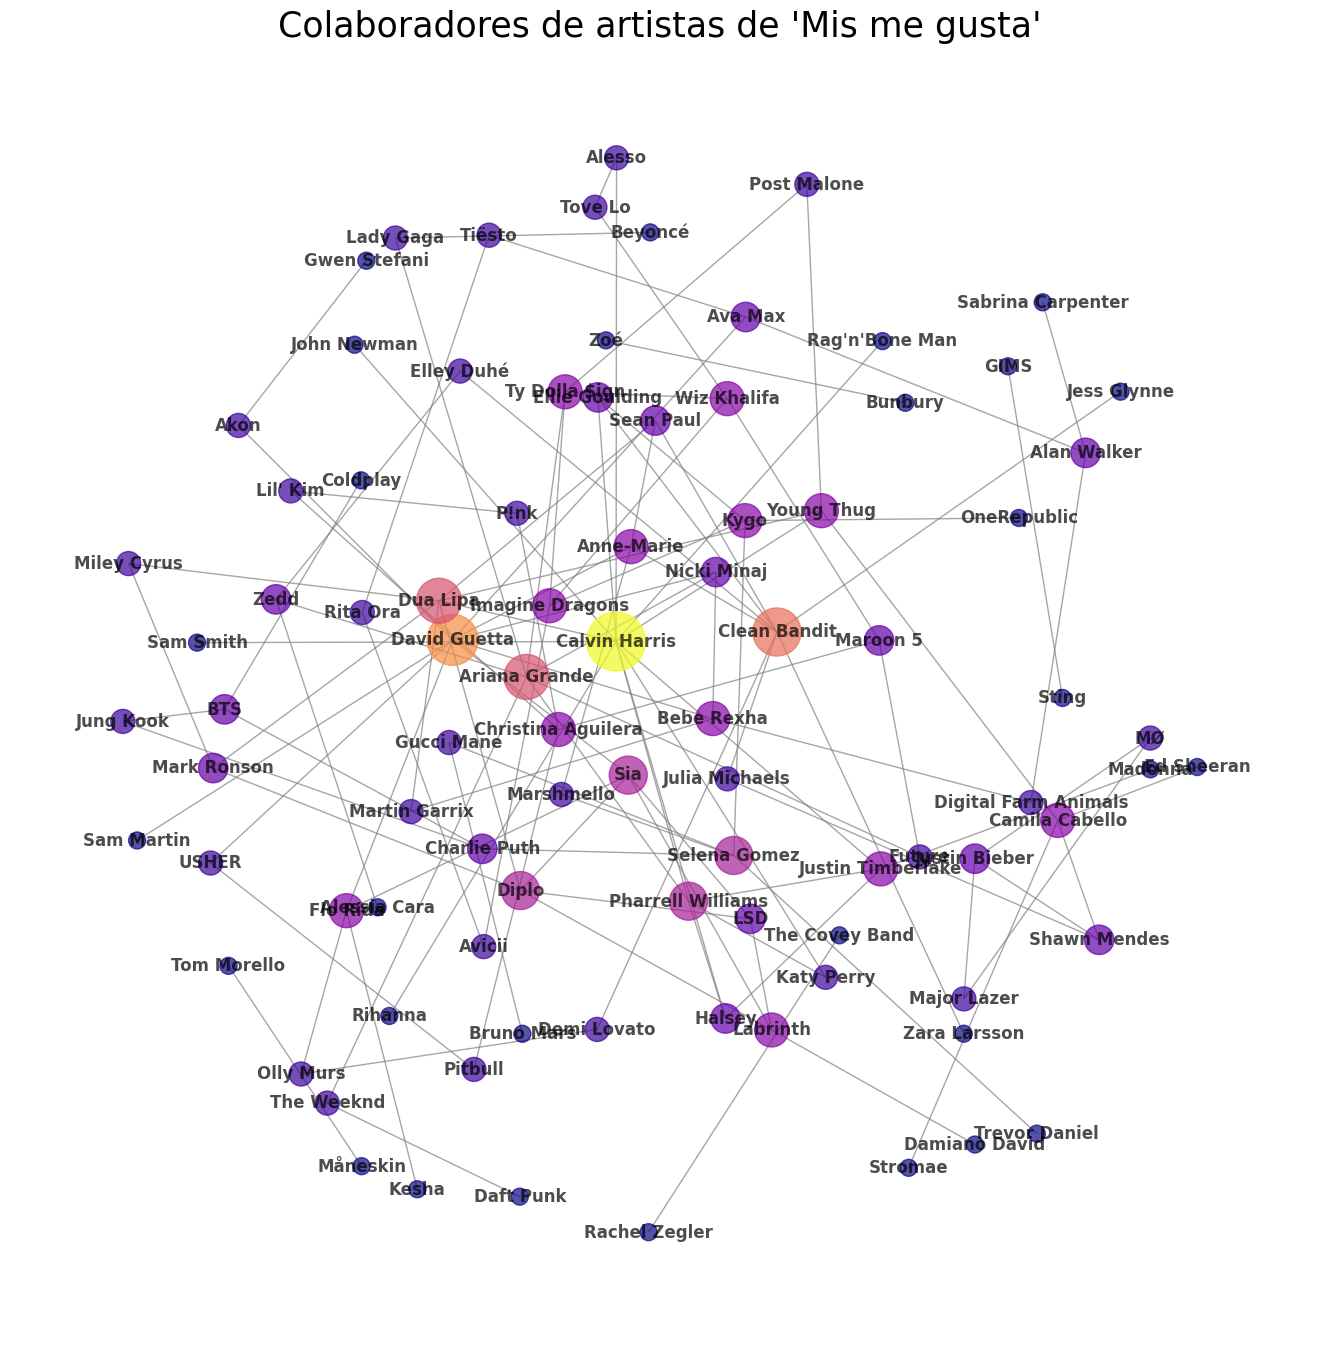

In [78]:
#Red Compleja
G = nx.Graph()
G.add_edges_from(edge_list)

pos = nx.spring_layout(G, seed=42, k=0.6)

degrees = [G.degree(n) for n in G.nodes()]
node_sizes = [deg * 150 for deg in degrees]

font_options = {
    'font_size': 12,
    'font_weight': 'bold'
}

plt.figure(figsize=(13, 13))

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=degrees,
    cmap=plt.cm.plasma,
    edge_color='grey',
    alpha=0.7,
    **font_options
)

plt.title("Colaboradores de artistas de 'Mis me gusta'", fontsize=25)
plt.axis("off")
plt.show()

In [75]:
len(list(G.nodes()))

91